## Incarcarea setului de date

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Încărcarea setului de date
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Afișarea dimensiunilor
print("Dimensiuni set antrenare:", x_train.shape, y_train.shape)
print("Dimensiuni set testare:", x_test.shape, y_test.shape)


ModuleNotFoundError: No module named 'tensorflow'

Distibutia claselor

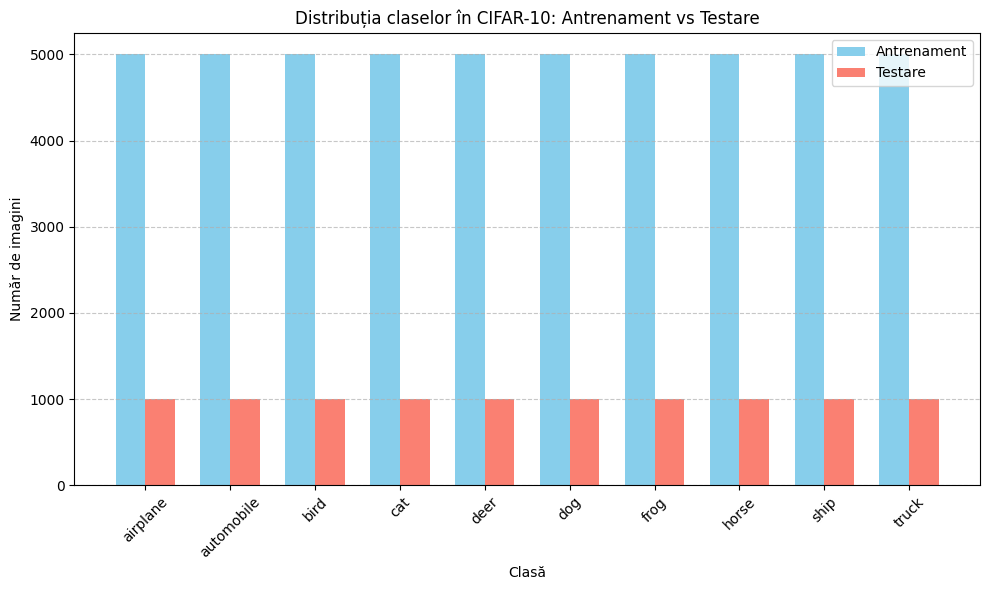

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Încărcarea datelor CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Aplatizarea etichetelor (trecem de la formă [n, 1] la [n])
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Numele claselor
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Calcularea frecvenței fiecărei clase
train_class_counts = np.bincount(y_train_flat, minlength=10)
test_class_counts = np.bincount(y_test_flat, minlength=10)

# Indexurile claselor pentru axa X
x = np.arange(len(class_names))
width = 0.35  # Lățimea barelor

# Crearea graficului
plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_class_counts, width, label='Antrenament', color='skyblue')
plt.bar(x + width/2, test_class_counts, width, label='Testare', color='salmon')

# Etichete și titluri
plt.title('Distribuția claselor în CIFAR-10: Antrenament vs Testare')
plt.xlabel('Clasă')
plt.ylabel('Număr de imagini')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Normalizarea intensitatii pixelilor

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalizarea intensităților pixelilor (din [0, 255] în [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertirea etichetelor în format one-hot (vectori binari)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verificare forme
print("Forma x_train:", x_train.shape)
print("Forma y_train_binar:", y_train.shape)
print("Exemplu y_train[0]:", y_train[0])
print("Exemplu y_train_binar[0]:", y_train[0])



Forma x_train: (50000, 32, 32, 3)
Forma y_train_binar: (50000, 10)
Exemplu y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Exemplu y_train_binar[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Retea secventiala cu un singur bloc VGG

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

#  VGG Block
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=10, activation='softmax'))

#  Compilare model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Antrenare model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4176 - loss: 1.6349 - val_accuracy: 0.6226 - val_loss: 1.0803
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6607 - loss: 0.9806 - val_accuracy: 0.6659 - val_loss: 0.9588
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7234 - loss: 0.7985 - val_accuracy: 0.6758 - val_loss: 0.9567
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7669 - loss: 0.6776 - val_accuracy: 0.6845 - val_loss: 0.9283
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8048 - loss: 0.5664 - val_accuracy: 0.6750 - val_loss: 0.9686
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8415 - loss: 0.4635 - val_accuracy: 0.6706 - val_loss: 1.0516
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8709 - loss: 0.3729 - val_accuracy: 0.6763 - val_loss: 1.0862
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9072 - loss: 0.2831 - val_acc

In [ ]:
# Evaluarea pe setul de testare (validare)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Acuratețea pe setul de validare: {test_accuracy:.4f}")
print(f"Pierderea (loss) pe setul de validare: {test_loss:.4f}")


Acuratețea pe setul de validare: 0.6396
Pierderea (loss) pe setul de validare: 5.9390


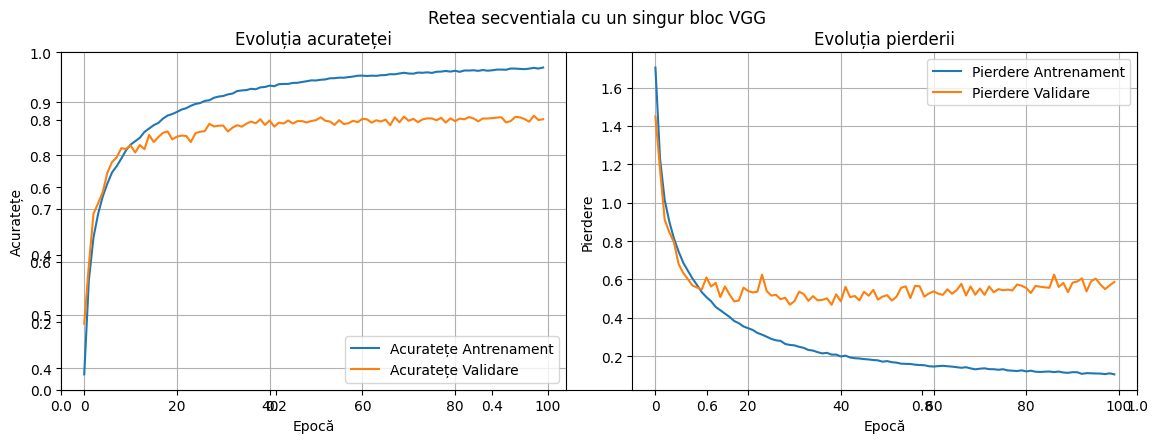

In [ ]:
import matplotlib.pyplot as plt

# Curba acurateței
plt.figure(figsize=(12, 5))
plt.title('Retea secventiala cu un singur bloc VGG \n')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Evoluția acurateței')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)

# Curba pierderii
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pierdere Antrenament')
plt.plot(history.history['val_loss'], label='Pierdere Validare')
plt.title('Evoluția pierderii')
plt.xlabel('Epocă')
plt.ylabel('Pierdere')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Retea cu doua blocuri VGG

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Bloc VGG 1 - 32 filtre
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc VGG 2 - 64 filtre
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluarea pe setul de testare (validare)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Acuratețea pe setul de validare: {test_accuracy:.4f}")
print(f"Pierderea (loss) pe setul de validare: {test_loss:.4f}")


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3213 - loss: 2.0282 - val_accuracy: 0.5380 - val_loss: 1.2961
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5173 - loss: 1.3502 - val_accuracy: 0.6028 - val_loss: 1.1027
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6009 - loss: 1.1345 - val_accuracy: 0.6914 - val_loss: 0.8883
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6537 - loss: 0.9961 - val_accuracy: 0.7176 - val_loss: 0.8380
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6908 - loss: 0.8988 - val_accuracy: 0.7070 - val_loss: 0.8536
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7174 - loss: 0.8143 - val_accuracy: 0.7450 - val_loss: 0.7552
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7324 - loss: 0.7752 - val_accuracy: 0.7584 - val_loss: 0.7084
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7504 - loss: 0.7270 - val_a

Reprezentare grafica

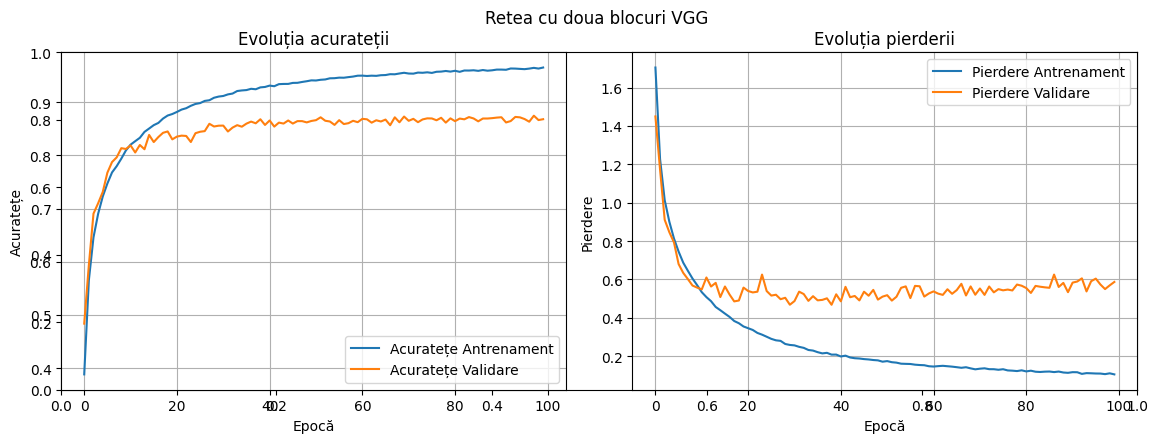

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Retea cu doua blocuri VGG \n')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Evoluția acurateții')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)

# Curba pierderii
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pierdere Antrenament')
plt.plot(history.history['val_loss'], label='Pierdere Validare')
plt.title('Evoluția pierderii')
plt.xlabel('Epocă')
plt.ylabel('Pierdere')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Retea cu trei blocuri VGG

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Bloc VGG 1 - 32 filtre
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc VGG 2 - 64 filtre
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc VGG 3 - 128 filtre (adăugat)
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilare model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Antrenare model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluare pe setul de testare
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Acuratețea pe setul de validare: {test_accuracy:.4f}")
print(f"Pierderea (loss) pe setul de validare: {test_loss:.4f}")


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.3212 - loss: 2.0198 - val_accuracy: 0.5412 - val_loss: 1.2628
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.5220 - loss: 1.3341 - val_accuracy: 0.6003 - val_loss: 1.1413
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6225 - loss: 1.0845 - val_accuracy: 0.6998 - val_loss: 0.8495
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6753 - loss: 0.9344 - val_accuracy: 0.6919 - val_loss: 0.9125
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7162 - loss: 0.8235 - val_accuracy: 0.7583 - val_loss: 0.6950
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7409 - loss: 0.7568 - val_accuracy: 0.7683 - val_loss: 0.6807
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7623 - loss: 0.6926 - val_accuracy: 0.7593 - val_loss: 0.7186
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7832 - loss: 0.6466 - v

Afisarea graficelor

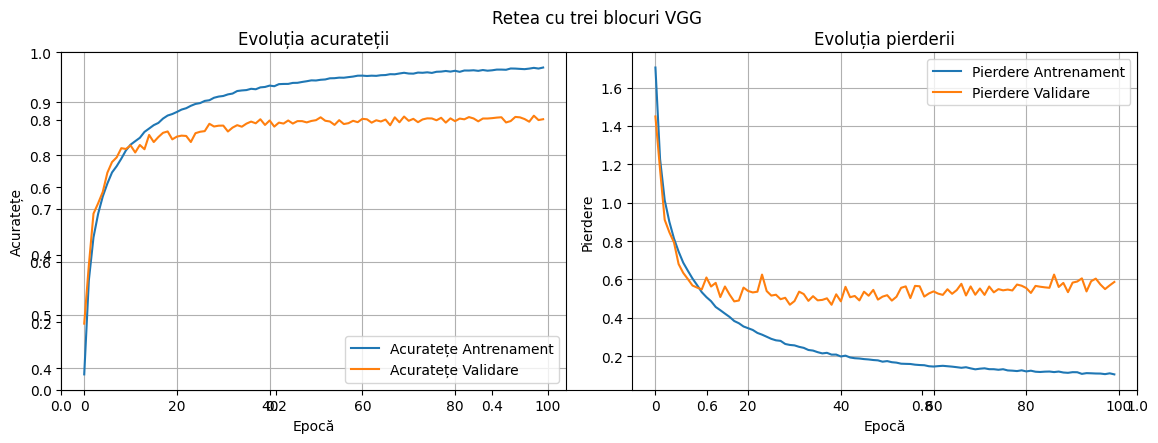

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Retea cu trei blocuri VGG \n')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Evoluția acurateții')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)

# Curba pierderii
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pierdere Antrenament')
plt.plot(history.history['val_loss'], label='Pierdere Validare')
plt.title('Evoluția pierderii')
plt.xlabel('Epocă')
plt.ylabel('Pierdere')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Tehnica Dropout, dupa fiecare strat de subesantionare si stratul complet conectat

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Bloc VGG 1 - 32 filtre
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout după subeșantionare

# Bloc VGG 2 - 64 filtre
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout după subeșantionare

# Bloc VGG 3 - 128 filtre
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout după subeșantionare

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))  # Dropout după stratul complet conectat
model.add(Dense(10, activation='softmax'))

# Compilarea modelului
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Antrenare
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluare
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Acuratețea pe setul de validare: {test_accuracy:.4f}")
print(f"Pierderea (loss) pe setul de validare: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.3100 - loss: 2.0323 - val_accuracy: 0.4836 - val_loss: 1.4496
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5383 - loss: 1.2920 - val_accuracy: 0.5936 - val_loss: 1.1721
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6324 - loss: 1.0456 - val_accuracy: 0.6905 - val_loss: 0.9110
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6837 - loss: 0.9203 - val_accuracy: 0.7100 - val_loss: 0.8463
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7184 - loss: 0.8209 - val_accuracy: 0.7313 - val_loss: 0.7932
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7490 - loss: 0.7448 - val_accuracy: 0.7676 - val_loss: 0.6803
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7660 - loss: 0.6870 - val_accuracy: 0.7875 - val_loss: 0.6341
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7788 - loss: 0.6459 - v

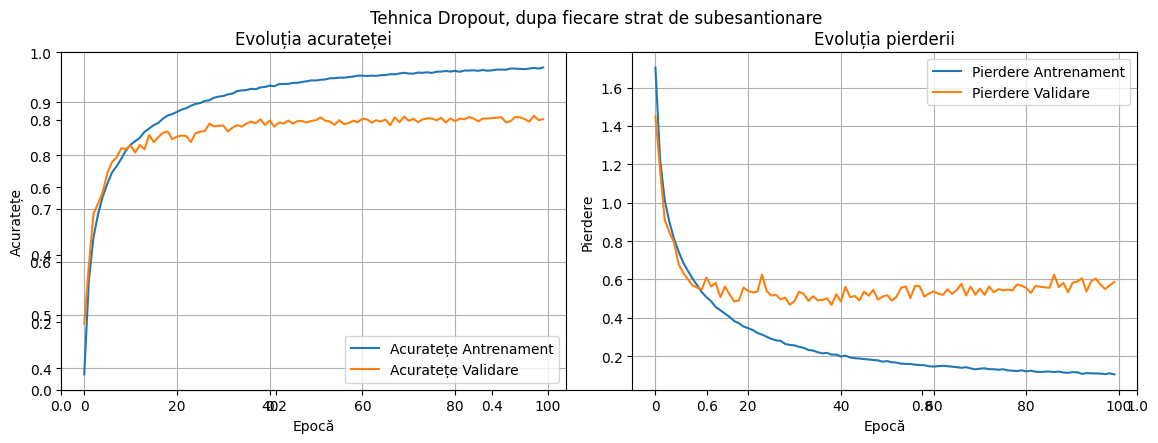

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Tehnica Dropout, dupa fiecare strat de subesantionare \n')


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Evoluția acurateței')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pierdere Antrenament')
plt.plot(history.history['val_loss'], label='Pierdere Validare')
plt.title('Evoluția pierderii')
plt.xlabel('Epocă')
plt.ylabel('Pierdere')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## Regularizarea ponderilor conexiunilor

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Coeficient de regularizare L2
weight_decay = 1e-4

model = Sequential()

# Bloc VGG 1 - 32 filtre
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay),
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc VGG 2 - 64 filtre
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc VGG 3 - 128 filtre
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu',
                kernel_initializer='he_uniform', kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilare
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Antrenare
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluare
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Acuratețea pe setul de validare: {test_accuracy:.4f}")
print(f"Pierderea (loss) pe setul de validare: {test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.3068 - loss: 2.2005 - val_accuracy: 0.5402 - val_loss: 1.4412
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.5383 - loss: 1.4508 - val_accuracy: 0.6576 - val_loss: 1.1267
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6310 - loss: 1.2139 - val_accuracy: 0.6596 - val_loss: 1.1291
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6783 - loss: 1.0807 - val_accuracy: 0.7368 - val_loss: 0.9224
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7152 - loss: 0.9980 - val_accuracy: 0.7507 - val_loss: 0.9110
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7443 - loss: 0.9282 - val_accuracy: 0.7806 - val_loss: 0.8397
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7638 - loss: 0.8864 - val_accuracy: 0.7794 - val_loss: 0.8652
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7844 - loss: 0.8482 - va

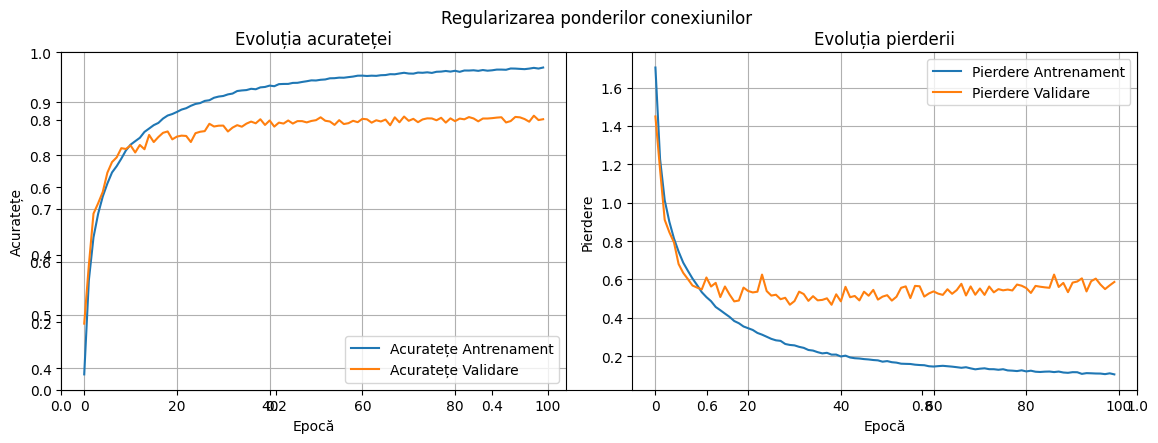

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Regularizarea ponderilor conexiunilor \n')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Evoluția acurateței')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)

# Curba pierderii
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pierdere Antrenament')
plt.plot(history.history['val_loss'], label='Pierdere Validare')
plt.title('Evoluția pierderii')
plt.xlabel('Epocă')
plt.ylabel('Pierdere')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()